In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv("https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day44-outlier-detection-using-percentiles/weight-height.csv")

In [6]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [7]:
df.Height.describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

C:\Users\Abdur rahim nishad\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Height', ylabel='Density'>

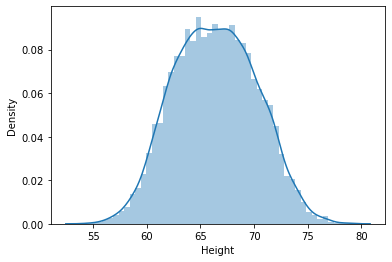

In [8]:
sns.distplot(df.Height)

C:\Users\Abdur rahim nishad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Height'>

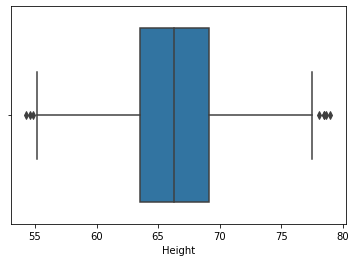

In [9]:
sns.boxplot(df.Height)

In [11]:
upper_limit=df.Height.quantile(.99)

In [12]:
upper_limit

74.7857900583366

In [14]:
lower_limit=df.Height.quantile(.01)

In [15]:
lower_limit

58.13441158671655

In [16]:
df[(df["Height"]>=upper_limit )| (df["Height"]<=lower_limit )]

,Gender,Height,Weight
23,Male,75.205974,228.761781
190,Male,76.709835,235.035419
197,Male,75.944460,231.924749
202,Male,75.140821,224.124271
215,Male,74.795375,232.635403
...,...,...,...
9761,Female,56.975279,90.341784
9825,Female,55.979198,85.417534
9895,Female,57.740192,93.652957
9904,Female,57.028857,101.202551


# Removal

In [17]:
new_df=df[(df["Height"]<=upper_limit ) & (df["Height"]>=lower_limit )]

In [18]:
new_df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


<AxesSubplot:xlabel='Height'>

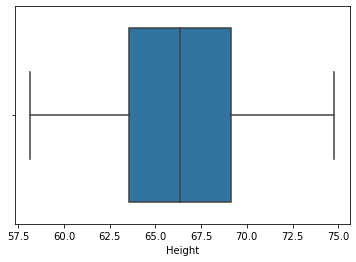

In [20]:
sns.boxplot(x=new_df.Height)

C:\Users\Abdur rahim nishad\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Height', ylabel='Density'>

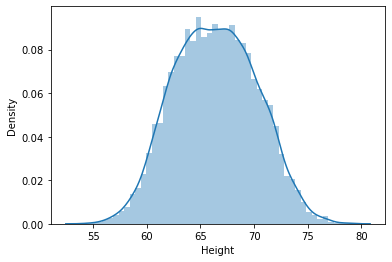

In [21]:
sns.distplot(df.Height)

# Capping -->winsorization

In [24]:
df["Height"]=np.where(df["Height"] >=upper_limit,
        upper_limit,
        np.where(df["Height"] <=lower_limit,
                lower_limit,
                df.Height))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [25]:
df.shape

(10000, 3)

In [28]:
df.Height.describe()

count    10000.000000
mean        66.366281
std          3.795717
min         58.134412
25%         63.505620
50%         66.318070
75%         69.174262
max         74.785790
Name: Height, dtype: float64

C:\Users\Abdur rahim nishad\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Height', ylabel='Density'>

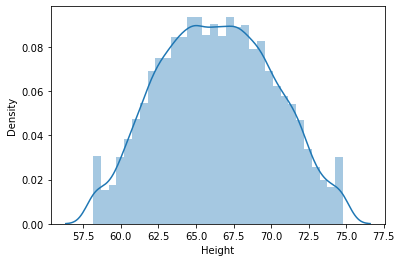

In [29]:
sns.distplot(df.Height)

C:\Users\Abdur rahim nishad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Height'>

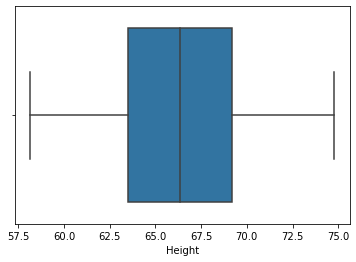

In [30]:
sns.boxplot(df.Height)